Import necessary modules and libraries
---

In [1]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Load Dataset from CSV file
---

In [2]:
import pandas as pd
housing_df = pd.read_csv("../input/housing.csv")

dataset = housing_df.values

Create an MLP model
---

In [3]:
X = dataset[:,0:13]
Y = dataset[:,13]

def mlp_model():
    model = Sequential()
    model.add(Dense(10, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = mlp_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


Train Model
---

In [4]:
history = model.fit(X, Y, epochs = 100, batch_size = 5, validation_split=0.2)

Train on 404 samples, validate on 101 samples
Epoch 1/100
404/404 [==============================] - 0s 1ms/step - loss: 556.7027 - val_loss: 27.6693
Epoch 2/100
404/404 [==============================] - 0s 325us/step - loss: 141.0658 - val_loss: 120.0623
Epoch 3/100
404/404 [==============================] - 0s 289us/step - loss: 115.3361 - val_loss: 120.5422
Epoch 4/100
404/404 [==============================] - 0s 285us/step - loss: 104.7976 - val_loss: 79.6457
Epoch 5/100
404/404 [==============================] - 0s 286us/step - loss: 96.6748 - val_loss: 48.9767
Epoch 6/100
404/404 [==============================] - 0s 286us/step - loss: 90.6810 - val_loss: 53.1026
Epoch 7/100
404/404 [==============================] - 0s 284us/step - loss: 83.4002 - val_loss: 37.1761
Epoch 8/100
404/404 [==============================] - 0s 284us/step - loss: 78.9651 - val_loss: 46.7531
Epoch 9/100
404/404 [==============================] - 0s 291us/step - loss: 75.5418 - val_loss: 39.6987
Epoch

Visualization
---

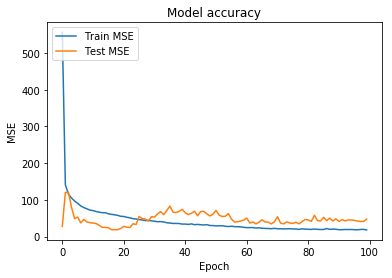

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train MSE', 'Test MSE'], loc='upper left')
plt.show()

Prediction on new data
---

In [6]:
my_new_data = np.asarray((0.08829,12.50,7.870,0,0.5240,6.0120,66.60,5.5605,5,311.0,15.20,395.60,12.43))
my_new_data = my_new_data.reshape((1,13))
price_prediction = model.predict(my_new_data)

print(price_prediction)

[[21.61729]]
